Data Importation and Viewing
To begin analysis on the data, I imported the data into python and viewed the data. This would enable to know how to analyse the data.


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
#import the data into a data frame and view the dataframe

df = pd.read_csv('https://raw.githubusercontent.com/Pelumioluwa/MBAN6110Class/main/Class_code/midterm_data.csv')
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [4]:
#view the information of the data to determine if there are missing data in the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


Data Cleaning
From the view above, we can see that there are 5000 entries in the data and only two columns (device (100) and location (30)) have missing data. I want to check if there are any entries with missing data in both device and location columns. I would drop those first

In [5]:
#check if there are any entries missing data in the location and device column
df[df['location'].isnull() & df['device'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
2130,2131,20,5,21.841304,6,19,243.39,0,NaN,NaN


In [6]:
#drop the column and check the information of the df
df.drop([2130], axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4999 non-null   int64  
 1   age              4999 non-null   int64  
 2   sessions         4999 non-null   int64  
 3   time_spent       4999 non-null   float64
 4   pages_visited    4999 non-null   int64  
 5   cart_items       4999 non-null   int64  
 6   cart_value       4999 non-null   float64
 7   checkout_status  4999 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.6+ KB


Further to the above, I would check for all the missing data in location columns. Then check for the missing data in device columns and drop those too. My reason for dropping these entries is because the total of their missing data (99 + 29 = 128) represents less than 10% of the total data entries. Therefore we still maintain the integrity of the data. 



In [7]:
#identify and drop the missing data entries in location and device columns 
#and view the information of the df
df.drop(df[df['location'].isnull()].index, axis=0, inplace=True)
df.drop(df[df['device'].isnull()].index, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4871 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4871 non-null   int64  
 1   age              4871 non-null   int64  
 2   sessions         4871 non-null   int64  
 3   time_spent       4871 non-null   float64
 4   pages_visited    4871 non-null   int64  
 5   cart_items       4871 non-null   int64  
 6   cart_value       4871 non-null   float64
 7   checkout_status  4871 non-null   int64  
 8   device           4871 non-null   object 
 9   location         4871 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 418.6+ KB


Also checked the data type of each data to ensure they are the right data. Everything looks fine and all data types are good. We would also check for duplicates in the data. From the below, we see that there are no duplicates in the data, as the user id is the unique identifier.

In [8]:
#check if there are any duplicate in the user_id column
boolean = df['userID'].duplicated().any() 
print(boolean)

False


Data exploration and summary
Further to cleaning the data, we can view the data understand the overall view of the data. We would build our customer personas and segment them into two types of customers (those who complete check and those who do not).

To build our customer personas, we would generate characteristics of customers in each segment and then analyse the segments.

From the below, we can view an overall statistics of our customers. It is understood that the age of most customers are in their 40s as the median and mean of the ages is in their 40s. Most of customers have about 5 sessions. 

In [9]:
#check the descriptive statistics of the data 
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,4871.000000,4871.00000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871,4871
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2522,1028
mean,2503.251488,41.53295,5.023609,25.172038,5.777458,14.971258,149.459444,0.273455,NaN,NaN
std,1445.707937,14.04452,2.589914,9.821864,2.566198,6.054916,68.811486,0.445778,NaN,NaN
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1251.500000,29.00000,3.000000,18.298029,4.000000,10.000000,92.415000,0.000000,NaN,NaN
50%,2505.000000,42.00000,5.000000,25.054759,6.000000,15.000000,143.020000,0.000000,NaN,NaN
75%,3760.500000,54.00000,7.000000,31.991099,8.000000,20.000000,198.550000,1.000000,NaN,NaN


Inorder to segment our customers, we need to identify the customers who complete check out and who do not. The first step in this would be to convert the checkout status to categorical data of who completed and who did not 

In [10]:
#convert the checkout status column to who completed check out and who did not 
#create a function to categorize the data 
def categorize(x):
    if x == 0:
        return 'No'
    elif x == 1:
        return 'Yes'
    else:
        return 'Unidentified Category'

In [11]:
#Create new column with check status using the categorize function
df['conv_checkout_status'] = df['checkout_status'].apply(categorize)
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,conv_checkout_status
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1,No
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3,No
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4,No
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2,Yes
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4,Yes


Further to the above, we would create our personas and breakdown each column by the converted checkout status . From the below, it shows that most of our customer fall under the 'did not check out status'. 

First, we would build the characteristics of customers who did not check out. We can see the following 
they mostly live in location 4, 
have an average session of 5, 
spend an average time of 22 mins, 
have an average of 15 items in their cart, with a maxium of 25 items
have an average value of $152, with a maximum of $427
visit an average of 5 pages or less, 
mostly use deskop for their device of choice 




In [12]:
#check their device 
df.groupby('conv_checkout_status')['device' ].describe().loc['No']

count        3539
unique          3
top       Desktop
freq         1802
Name: No, dtype: object

In [13]:
#check their page visited 
df.groupby('conv_checkout_status')['pages_visited' ].describe().loc['No']

count    3539.000000
mean        5.208251
std         2.650315
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        12.000000
Name: No, dtype: float64

In [14]:
#check their cart value
df.groupby('conv_checkout_status')['cart_value'].describe().loc['No']

count    3539.000000
mean      152.827485
std        74.971948
min        20.410000
25%        85.615000
50%       147.150000
75%       209.740000
max       427.400000
Name: No, dtype: float64

In [15]:
#groupby converted check_out status 
df.groupby('conv_checkout_status')['location'].describe().loc['No']


count           3539
unique             5
top       Location 4
freq             737
Name: No, dtype: object

In [16]:
#check their sessions
df.groupby('conv_checkout_status')['sessions'].describe().loc['No']

count    3539.000000
mean        5.055100
std         2.600401
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: No, dtype: float64

In [17]:
#check their time spent
df.groupby('conv_checkout_status')['time_spent'].describe().loc['No']

count    3539.000000
mean       22.858777
std        10.326950
min         1.000000
25%        16.035218
50%        21.656175
75%        28.436422
max        90.000000
Name: No, dtype: float64

In [18]:
#check their cart items
df.groupby('conv_checkout_status')['cart_items'].describe().loc['No']

count    3539.000000
mean       15.300367
std         6.694617
min         5.000000
25%         9.000000
50%        15.000000
75%        22.000000
max        25.000000
Name: No, dtype: float64

Second, we would build the characteristics of customers who did check out. We can see the following 
 

have an average session of 4, 
spend an average time of 31 mins, 
have an average of 14 items in their cart, with a maxium of 20 items
mostly use deskop for their device of choice 
have an average value of $140, with a maximum of $313 
visit an average of 7 pages or more, 
they mostly live in location 4

In [19]:
#check their time spent
df.groupby('conv_checkout_status')['time_spent'].describe().loc['Yes']

count    1332.000000
mean       31.318157
std         4.178320
min        25.000659
25%        27.606351
50%        30.943031
75%        34.539573
max        39.966537
Name: Yes, dtype: float64

In [20]:
#check their sessions
df.groupby('conv_checkout_status')['sessions'].describe().loc['Yes']

count    1332.000000
mean        4.939940
std         2.560932
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Yes, dtype: float64

In [21]:
#check their cart items
df.groupby('conv_checkout_status')['cart_items'].describe().loc['Yes']

count    1332.000000
mean       14.096847
std         3.735881
min         8.000000
25%        11.000000
50%        14.000000
75%        17.000000
max        20.000000
Name: Yes, dtype: float64

In [22]:
#groupby converted check_out status 
df.groupby('conv_checkout_status')['location'].describe().loc['Yes']

count           1332
unique             5
top       Location 4
freq             291
Name: Yes, dtype: object

In [23]:
#check their cart value
df.groupby('conv_checkout_status')['cart_value'].describe().loc['Yes']

count    1332.000000
mean      140.510871
std        47.683980
min        43.220000
25%       102.810000
50%       135.830000
75%       174.365000
max       313.760000
Name: Yes, dtype: float64

In [24]:
#check their page visited 
df.groupby('conv_checkout_status')['pages_visited' ].describe().loc['Yes']

count    1332.000000
mean        7.289790
std         1.507841
min         2.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        12.000000
Name: Yes, dtype: float64

In [25]:
#check their device 
df.groupby('conv_checkout_status')['device' ].describe().loc['Yes']

count        1332
unique          3
top       Desktop
freq          720
Name: Yes, dtype: object

From building our persona characters above, We need to visiualize.
First we identify if there are any outliers. We identified that though cart value has some outliers, they are left in as they are not too far off and are not outliers in other characteristics. Therefore, they would be applicable to our analysis.

Second, We need to view the distrubution of our data
 

<AxesSubplot:ylabel='pages_visited'>

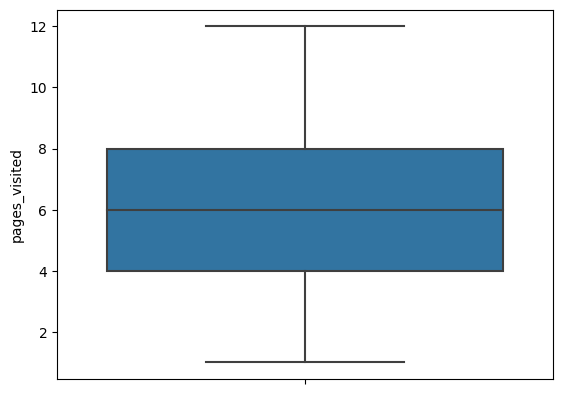

In [26]:
#check for outliers in the page visited
sns.boxplot(data = df, y='pages_visited')

<AxesSubplot:ylabel='cart_items'>

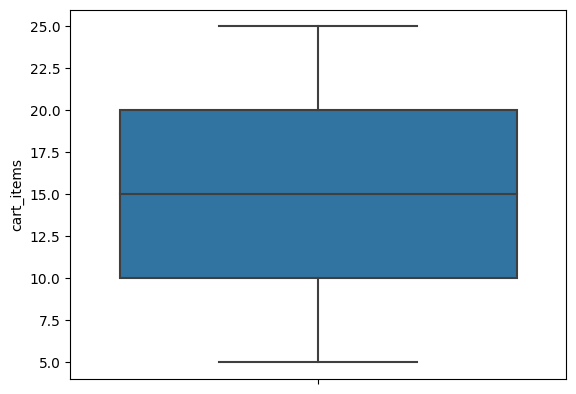

In [27]:
#check for outliers in the cart items
sns.boxplot(data = df, y='cart_items')


<AxesSubplot:ylabel='cart_value'>

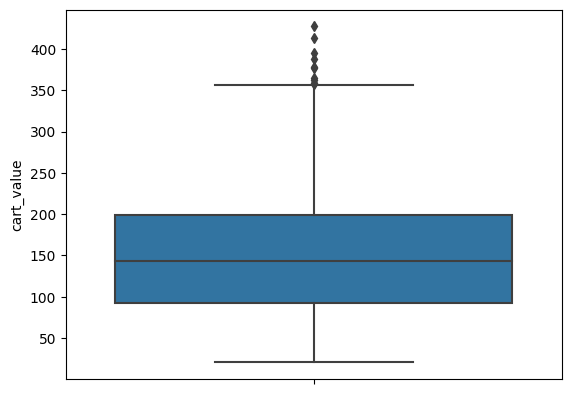

In [28]:
#check for outliers in the cart value
sns.boxplot(data = df, y='cart_value')

<AxesSubplot:xlabel='conv_checkout_status', ylabel='Count'>

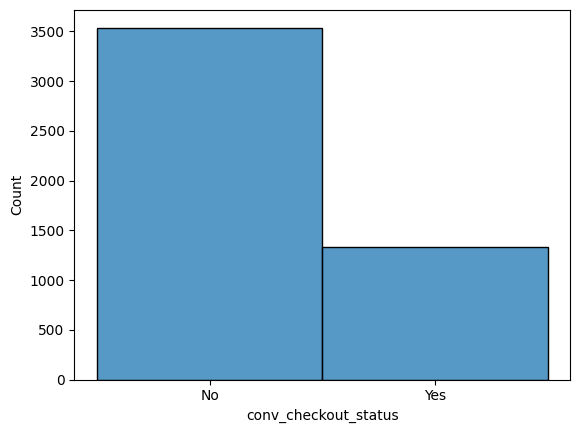

In [29]:
#visiualize the population of those who check in and those who do not
sns.histplot(df['conv_checkout_status'])

<AxesSubplot:xlabel='conv_checkout_status'>

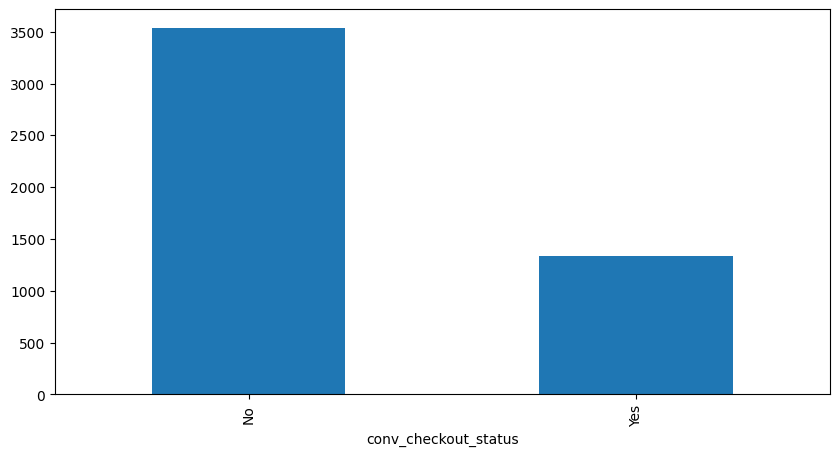

In [30]:
df.groupby('conv_checkout_status')['age'].count().plot(kind='bar',figsize=(10,5))

In [33]:
session_by_check_out = df.groupby('conv_checkout_status')['sessions'].aggregate(['sum','mean','median','count'])


<AxesSubplot:xlabel='conv_checkout_status'>

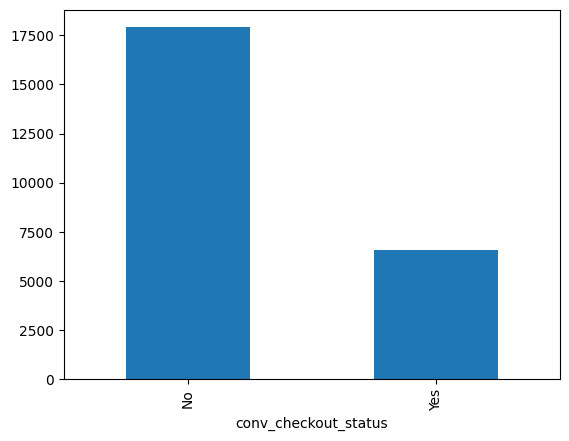

In [34]:
session_by_check_out['sum'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='conv_checkout_status'>

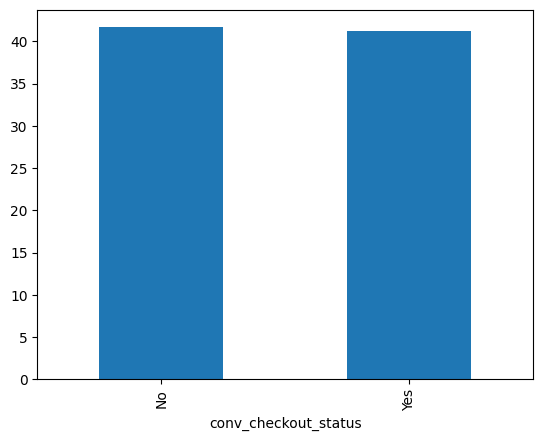

In [31]:
age_by_check_out = df.groupby('conv_checkout_status')['age'].aggregate(['sum','mean','median','count'])
age_by_check_out['mean'].sort_values(ascending=False).plot(kind='bar')

Recommendations 
From the analysis above,
We can compare the characteristics of both personas

for those who did check out 
have an average session of 4, 
spend an average time of 31 mins, 
have an average of 14 items in their cart, with a maximum of 20 items
mostly use deskop for their device of choice 
have an average value of $140, with a maximum of $313 
visit an average of 7 pages or more, 
they mostly live in location 4

for those who did not check out 
they mostly live in location 4, 
have an average session of 5, 
spend an average time of 22 mins, 
have an average of 15 items in their cart, with a maximum of 25 items
have an average value of $152, with a maximum of $427
visit an average of 5 pages or less, 
mostly use deskop for their device of choice 

We can see that location plays a factor as most individual from location 4 check out. However, those who do not check out spend less time engaging on the platform and usually add more items to their cart which amount to a higher cart value. They usually have less sessions and visit less pages. The customer who do check out have more engagements and sessions with the platform. Therefore I would recommend increasing customer engagements on the platform. This would mean showing them products that they are more interested in buying or that support items they have purchase in the past. Therefore, they are more likely to include those items that they need in cart and purchase them as the amount or number of the cart items would not be too high that it discourages purchase
